## PyTorch Tutorial #07 - Linea Regression

In [1]:
import torch
import torch.nn as nn
import numpy as np

from sklearn import datasets
import matplotlib.pyplot as plt

c:\Users\Leandro\source\repos\PyTorchTest\PyTorchTest\TorchEnv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 0) Prepare data
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#   - forward pass> compute prediction
#   - backward pass: gradients
#   - update weights

### Ejemplo de implementación de regresión lineal con módulo Linear de PyTorch

In [3]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [4]:
# 1) Design model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [5]:
# 2) Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epoch: 10, loss = 4419.8286
epoch: 20, loss = 3298.2380
epoch: 30, loss = 2486.2666
epoch: 40, loss = 1897.8389
epoch: 50, loss = 1471.0056
epoch: 60, loss = 1161.1178
epoch: 70, loss = 935.9517
epoch: 80, loss = 772.2230
epoch: 90, loss = 653.0867
epoch: 100, loss = 566.3433


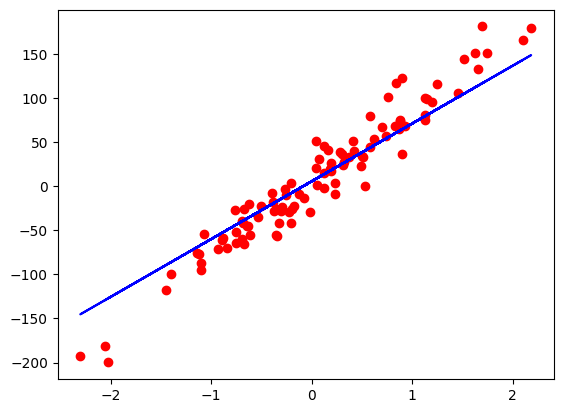

In [6]:
# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forwars pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # empty the gradients (puede ir al principio)
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()